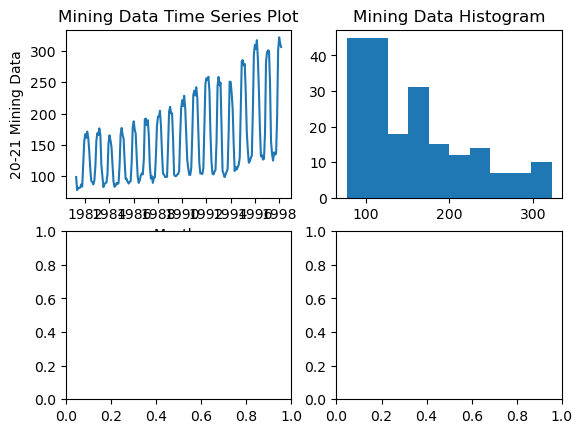

In [29]:
import pandas as pd
import numpy as np 
import os
import calendar
import matplotlib.pyplot as plt
import networkx as nx
from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
from sklearn import preprocessing


Mining = pd.read_csv('Timeseries Data.csv')
Mining1 = Mining.iloc[1:,0:2]
Mining1.Months = pd.to_datetime(Mining1.Months,format="%b'%y")
Mining_s = pd.Series(Mining1['20-21'].values,index=Mining1.Months)
figure, axis = plt.subplots(2,2)
axis[0,0].plot(Mining_s)
axis[0,0].set_title('Mining Data Time Series Plot')
axis[0,1].hist(Mining_s,bins=10)
axis[0,1].set_title('Mining Data Histogram')
axis[0,0].set_xlabel('Months')
axis[0,0].set_ylabel('20-21 Mining Data')
plt.show()



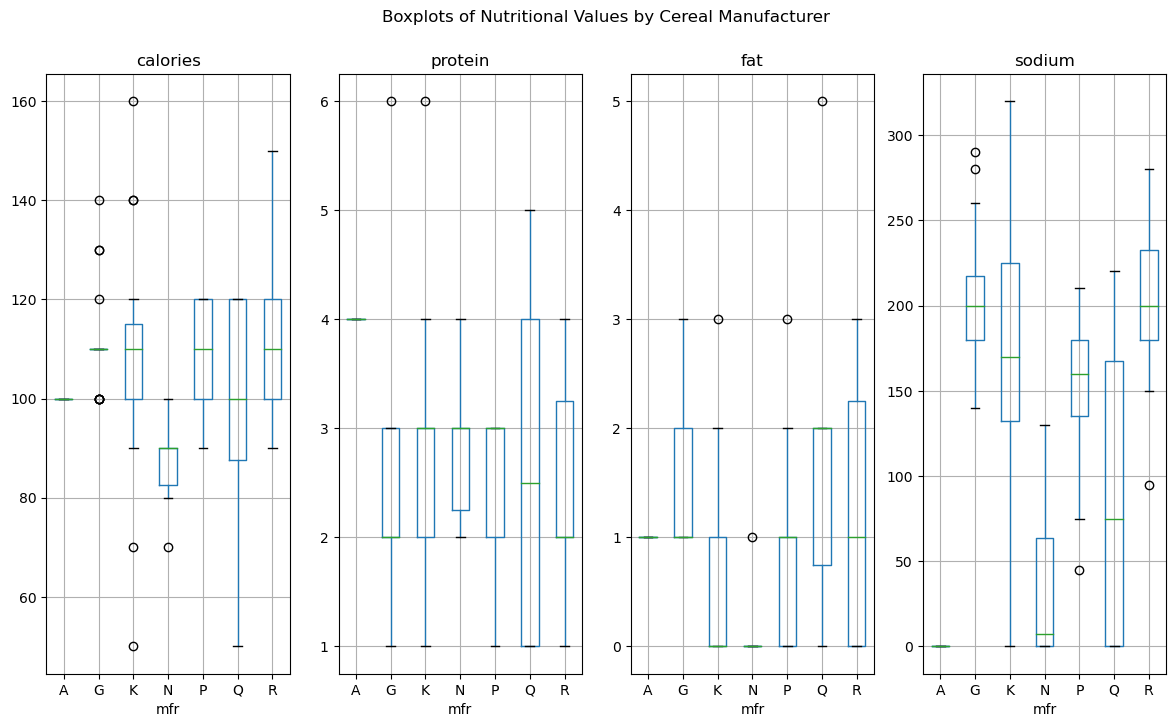

In [43]:
cereals = pd.read_csv('Cereals.csv')
cereals.columns = cereals.columns.str.replace(' ','_')  
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(14,8))

cereals.boxplot(column="calories",ax=axes[0],by='mfr')
cereals.boxplot(column="protein",ax=axes[1],by='mfr')
cereals.boxplot(column="fat",ax=axes[2],by='mfr')
cereals.boxplot(column="sodium",ax=axes[3],by='mfr')
plt.suptitle('Boxplots of Nutritional Values by Cereal Manufacturer')
plt.show()


<AxesSubplot:>

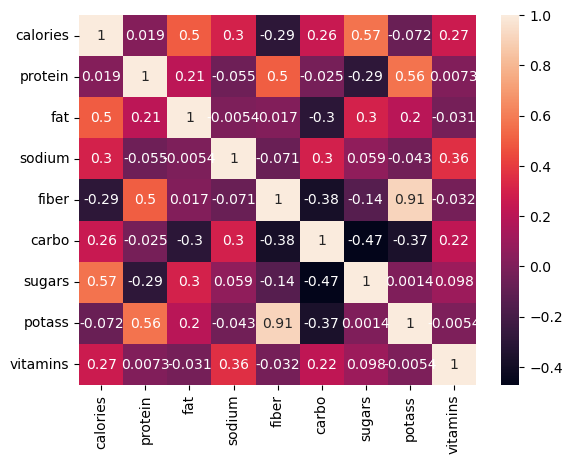

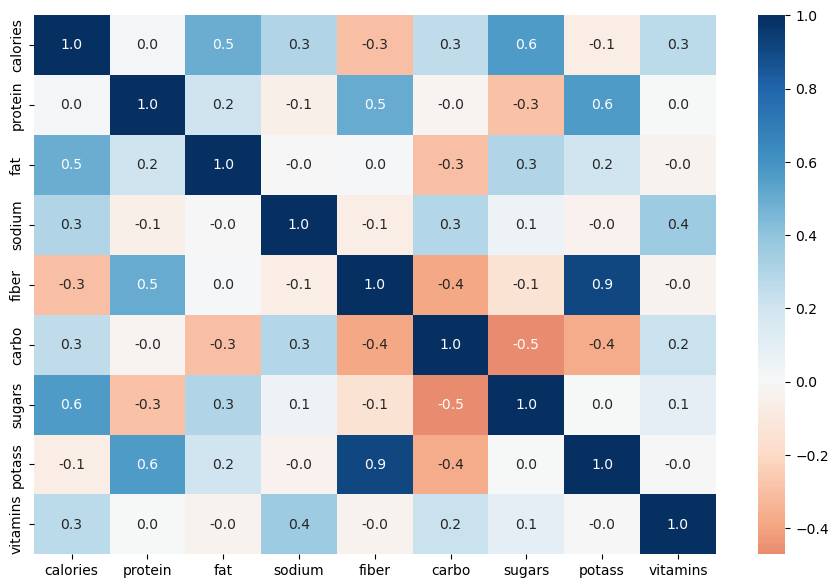

In [51]:
heat_map_table = cereals[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
corr=heat_map_table.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
fig,ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,fmt=".1f",cmap="RdBu",center=0,ax=ax)
